## importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
df=pd.read_csv("bank-full.csv",delimiter=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## EDA

In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
df.shape

(45211, 17)

In [7]:
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [8]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [9]:
df.duplicated().sum()

0

### Splitting based on data type

In [10]:
categorical=[i for i in df.columns if df[i].dtype=='O']
numerical=[i for i in df.columns if i not in categorical] 

### numerical feature correlation

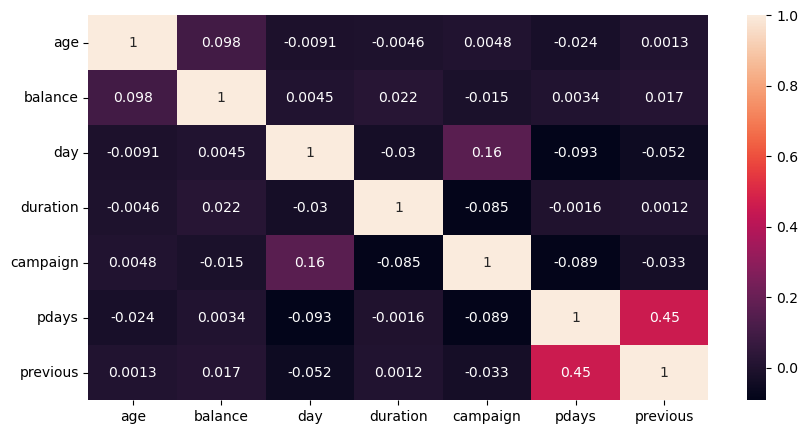

In [11]:
plt.figure(figsize=(10,5))
sns.heatmap(df[numerical].corr(),annot=True);

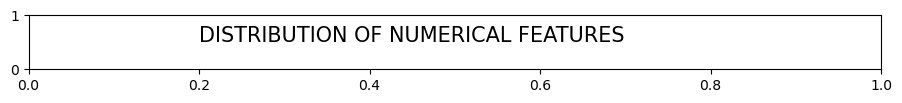

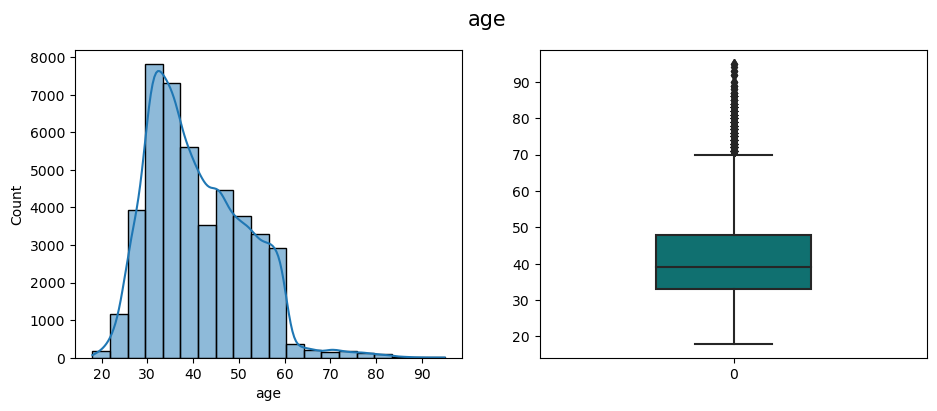

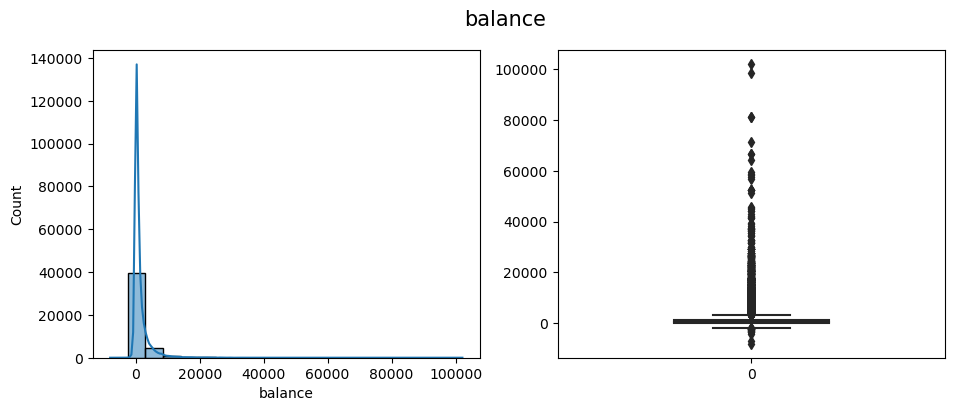

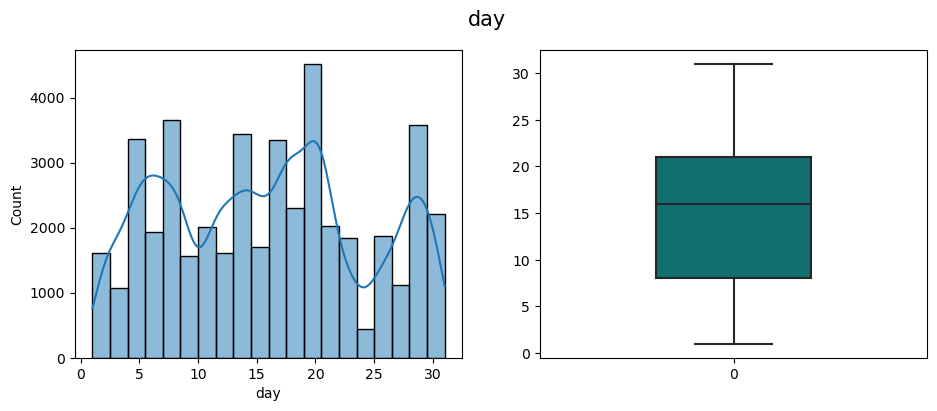

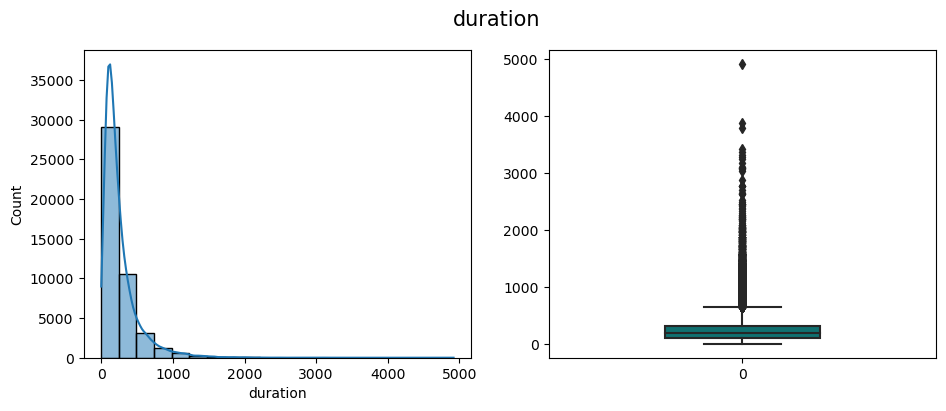

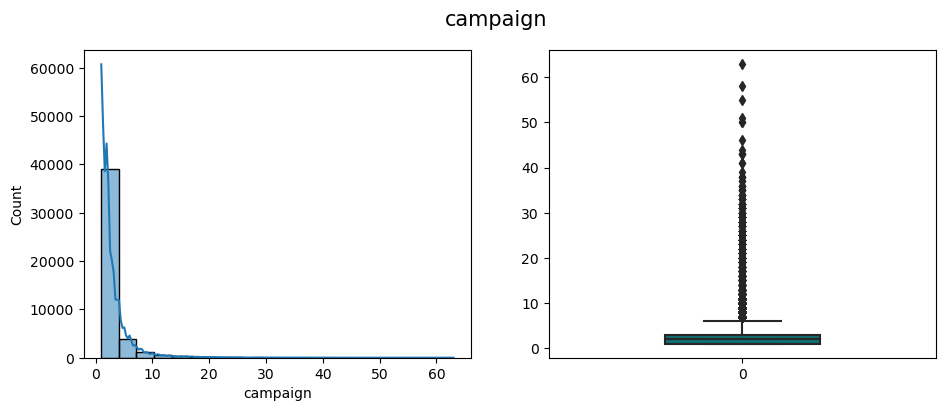

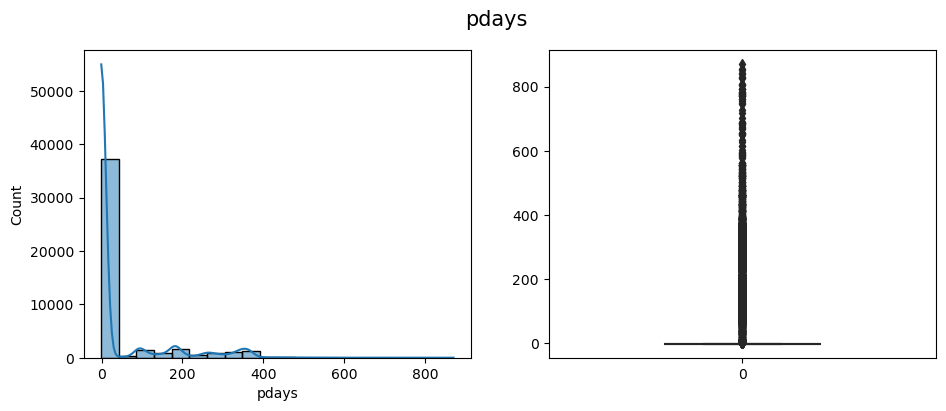

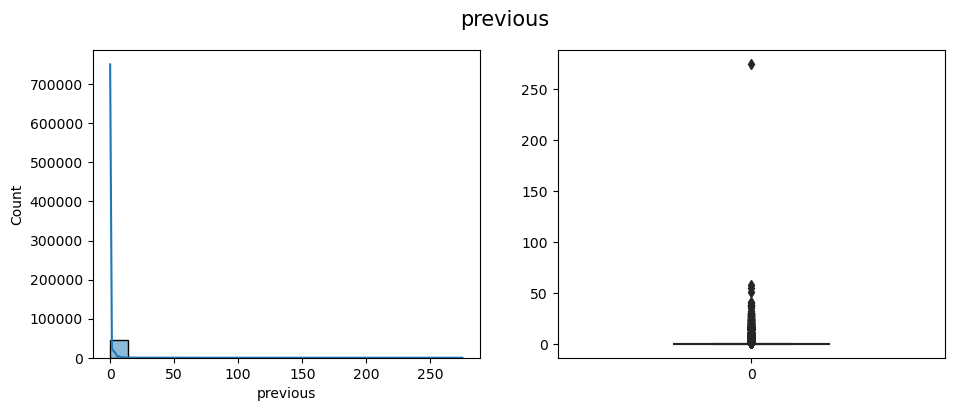

In [12]:
plt.figure(frameon=0,figsize=(11,.7))
plt.text(s="DISTRIBUTION OF NUMERICAL FEATURES",y=0.5,x=0.2,size=15)
for i in df[numerical]:
    fig,ax=plt.subplots(1,2,figsize=(11,4))
    sns.histplot(df[i],bins=20,kde=True,ax=ax[0])
    sns.boxplot(df[i],ax=ax[1],width=.4,color='teal')
    plt.suptitle(i,size=15)

+ ### most of the data are not normally distributed
+ ### there are plenty outliers

## Log transforming the data 

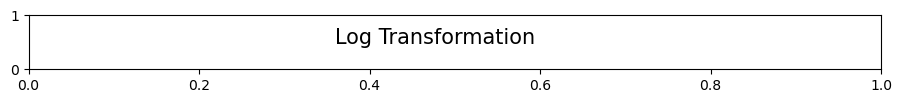

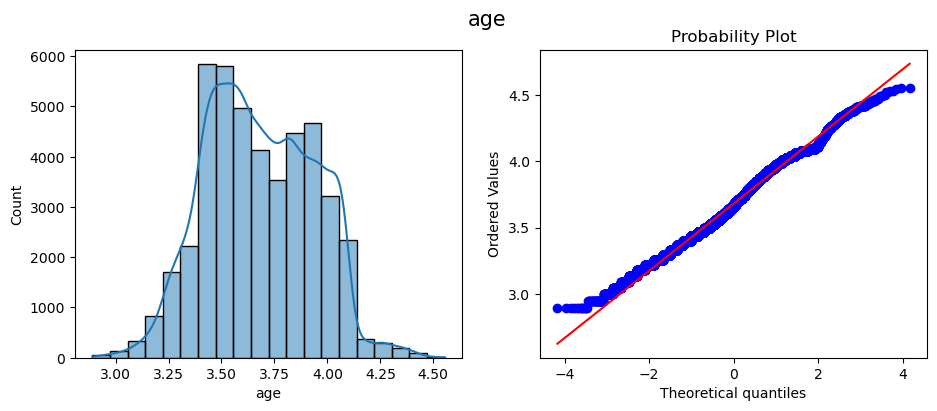

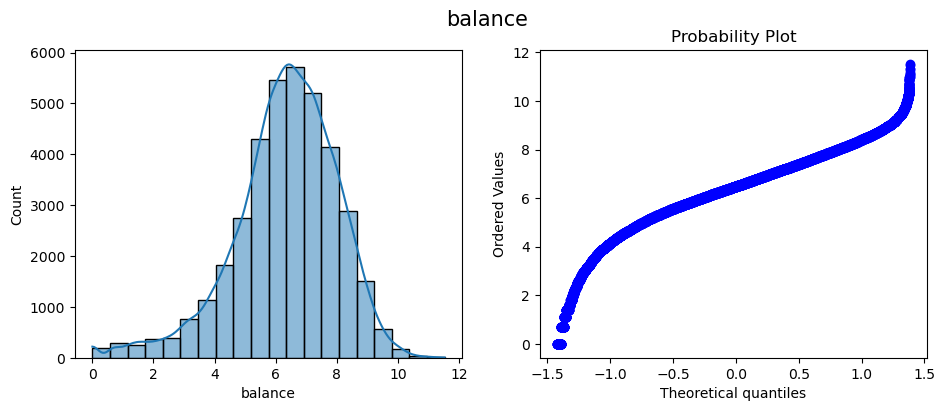

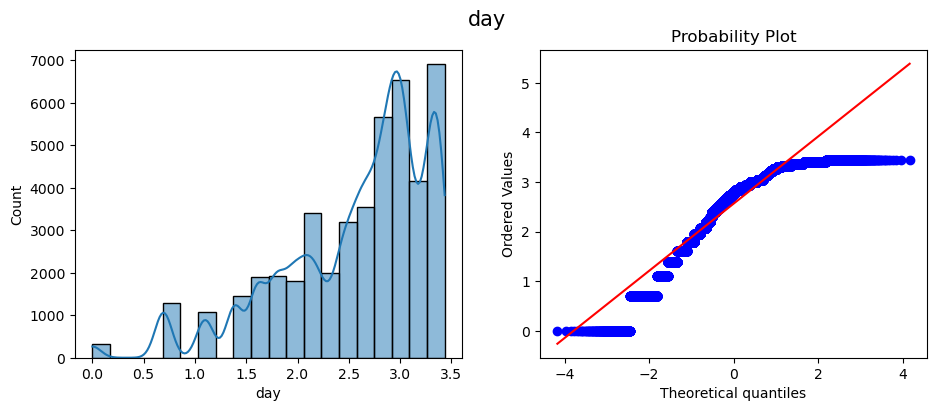

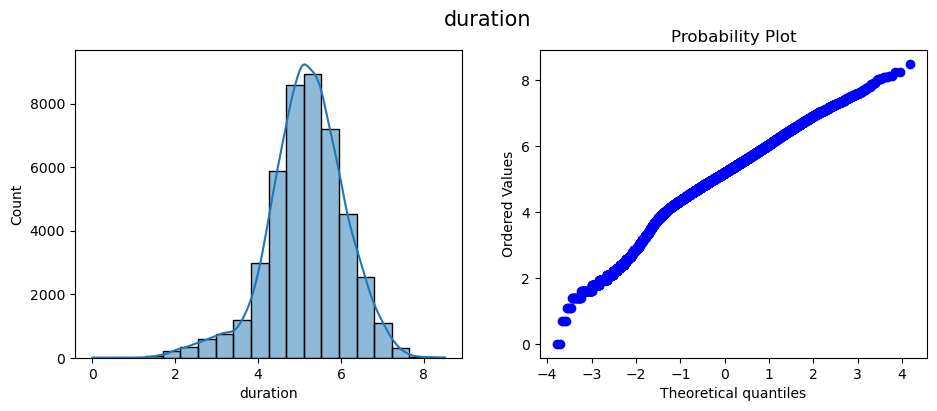

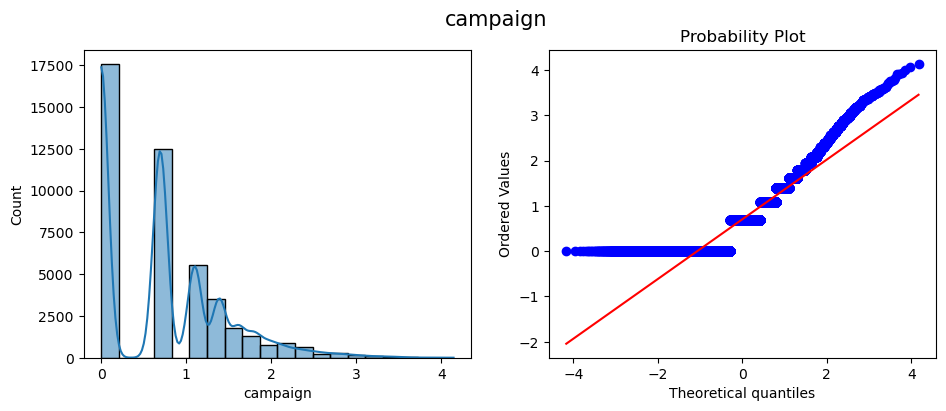

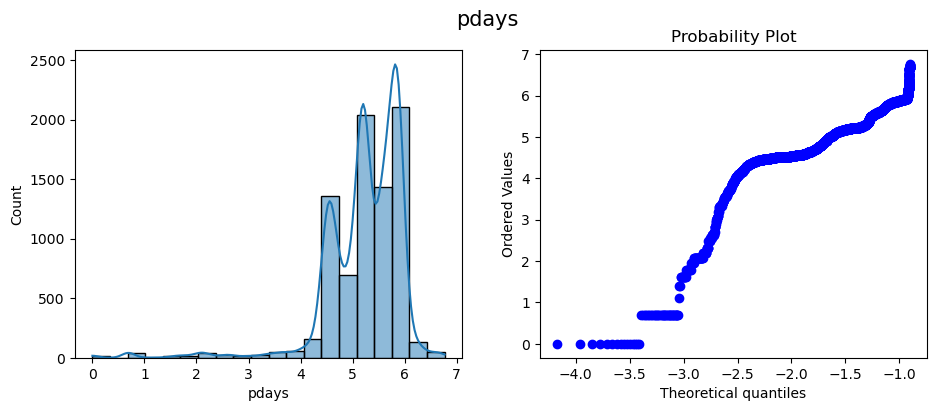

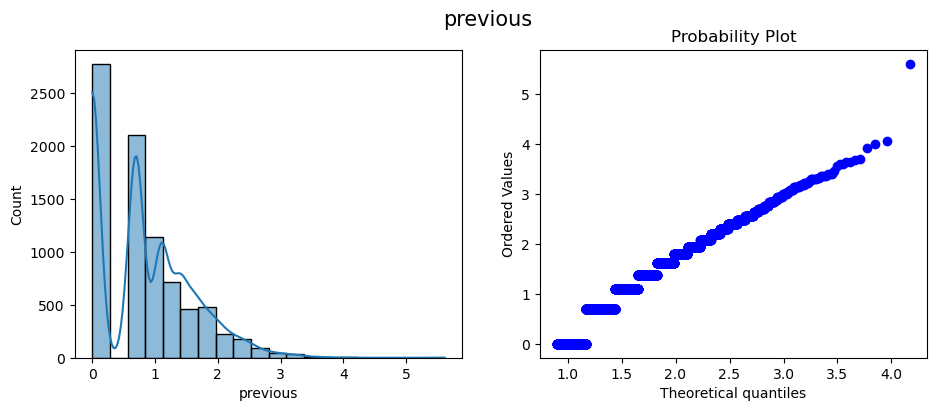

In [15]:
log_df=np.log(df[numerical])
plt.figure(frameon=0,figsize=(11,.7))
plt.text(s="Log Transformation ",y=0.48,x=0.36,size=15)
for i in log_df:
    fig,ax=plt.subplots(1,2,figsize=(11,4))
    sns.histplot(log_df[i],bins=20,kde=True,ax=ax[0])
    st.probplot(log_df[i],plot=plt,dist='norm')
    plt.suptitle(i,size=15)

+ ### still the data is not normally ditributed

## Imbalanced dataset

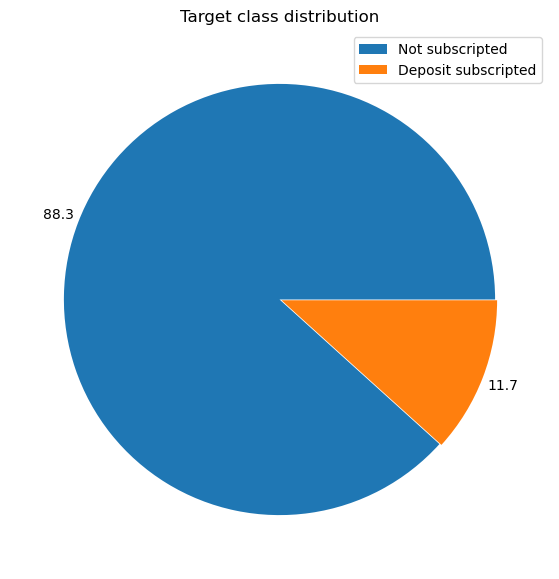

In [503]:
# df['y'].value_counts().plot.pie()
plt.figure(figsize=(10,7))
plt.pie(df['y'].value_counts(),wedgeprops={'linewidth':5},autopct=lambda x:round(x,2),pctdistance=1.1,labeldistance=.4,explode=[0,0.01])
plt.legend(['Not subscripted',"Deposit subscripted"])
plt.title('Target class distribution');

+ ### This is hugely imbalanced data
+ ### with 88% belongs in one class
+ ### and remaining 11% goes in second class

### Outlier handling


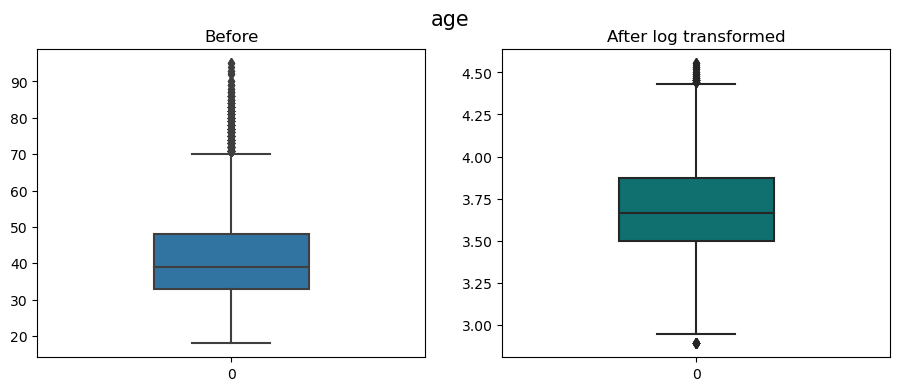

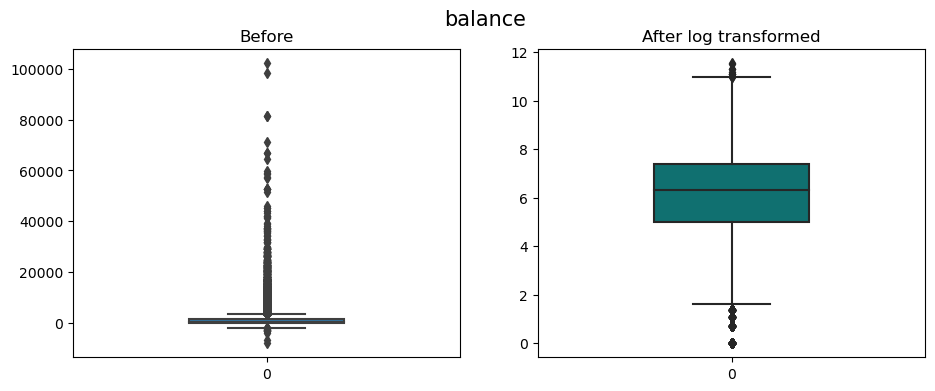

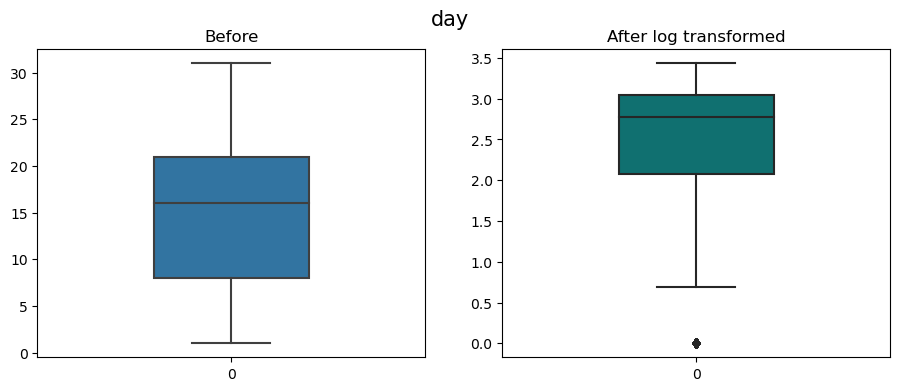

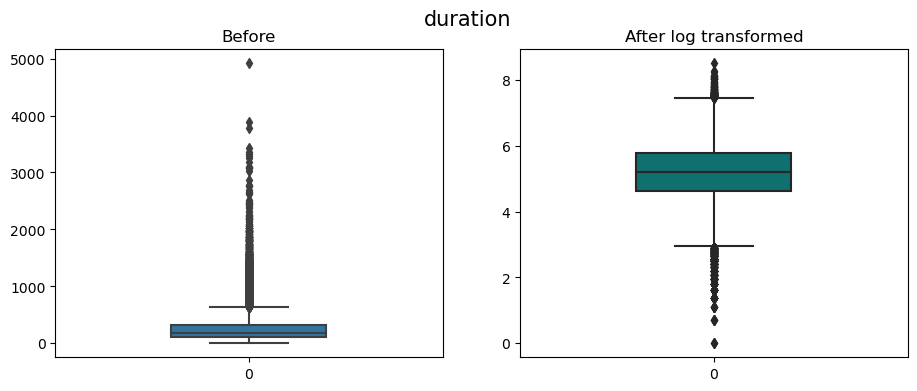

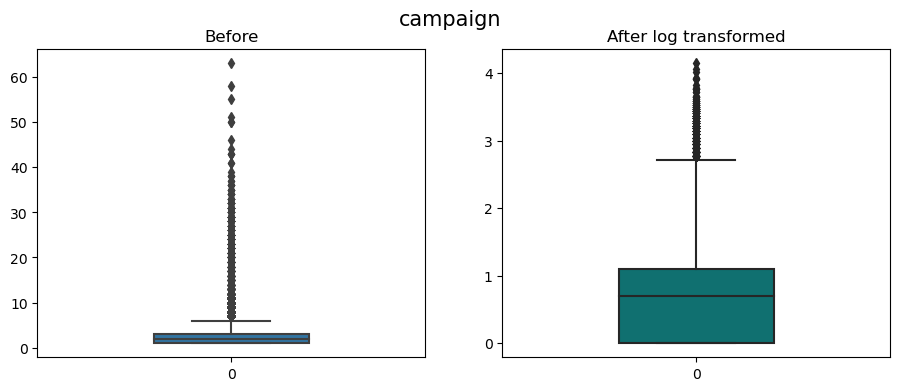

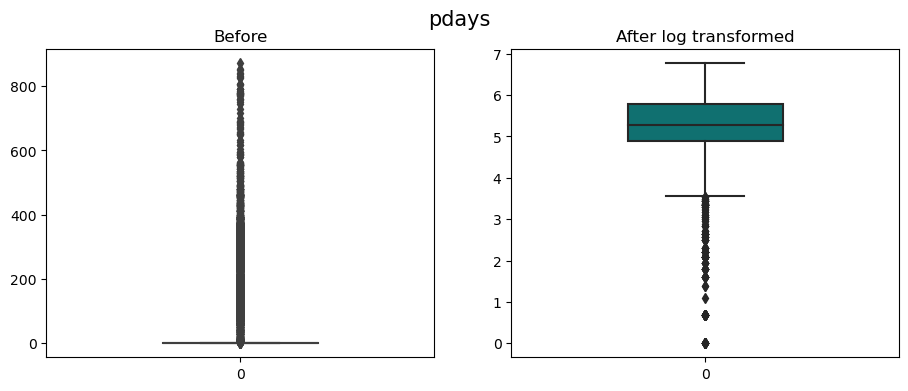

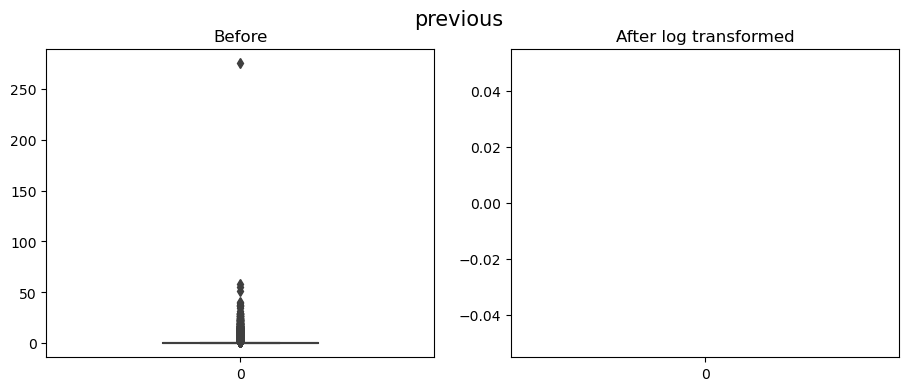

In [21]:
for i in numerical:
    fig,ax=plt.subplots(1,2,figsize=(11,4))
    sns.boxplot(df[i],ax=ax[0],width=.4)
    ax[0].set_title("Before")
    sns.boxplot(log_df[i],ax=ax[1],width=.4,color='teal')
    ax[1].set_title("After log transformed")
    plt.suptitle(i,size=15)

+ ### Even after log transforming , outliers still there

### Relation between age and balance


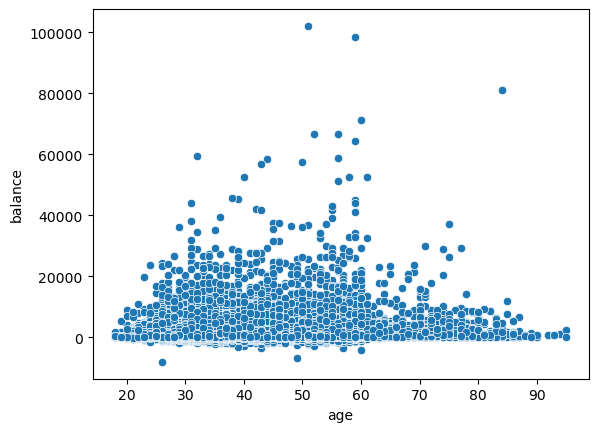

In [24]:
sns.scatterplot(df,x='age',y='balance');

## Categorical feature distribution

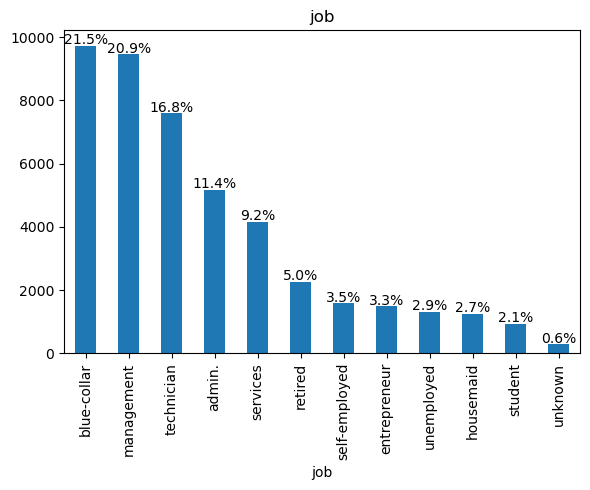

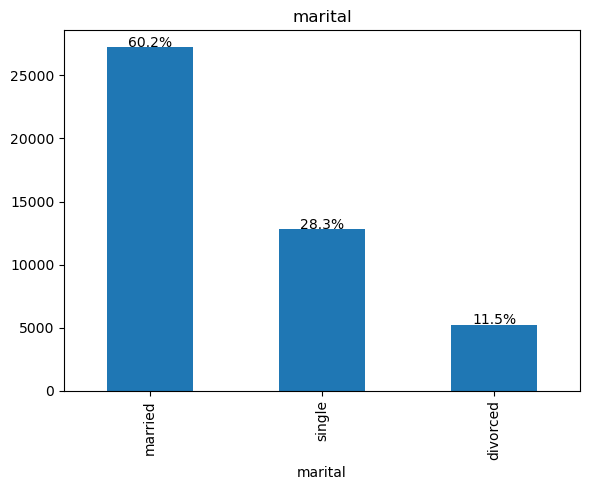

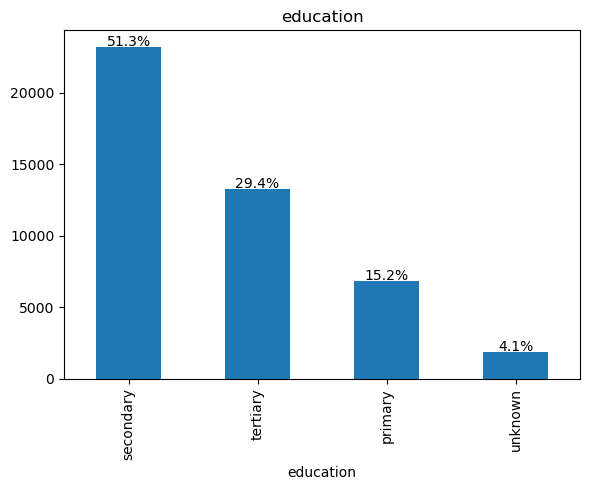

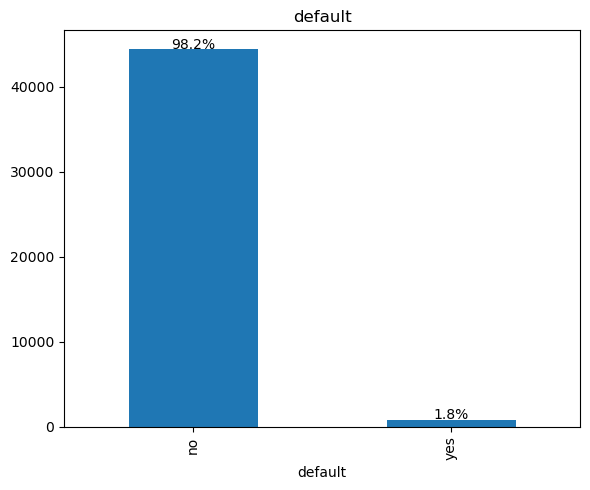

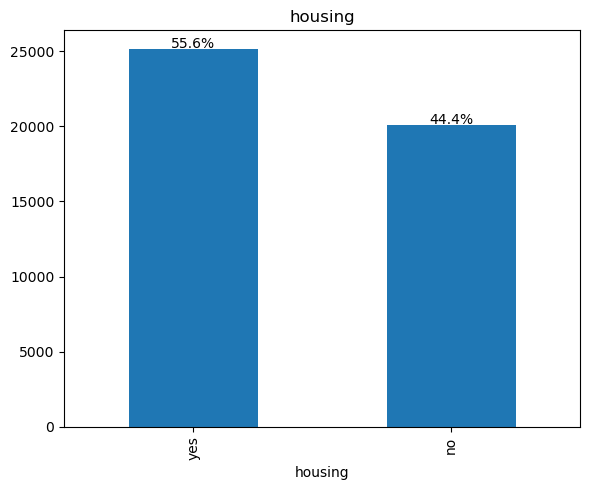

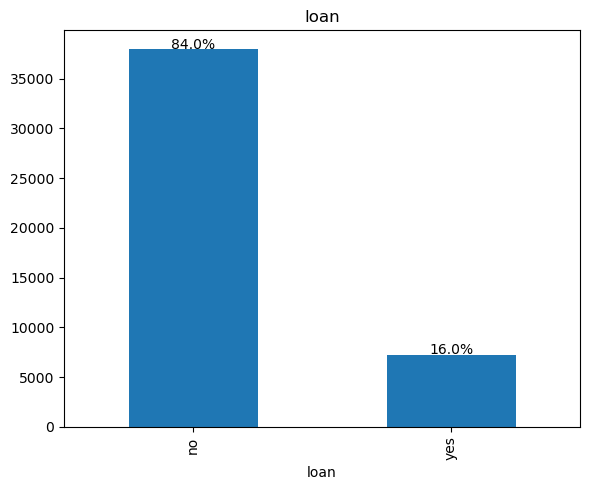

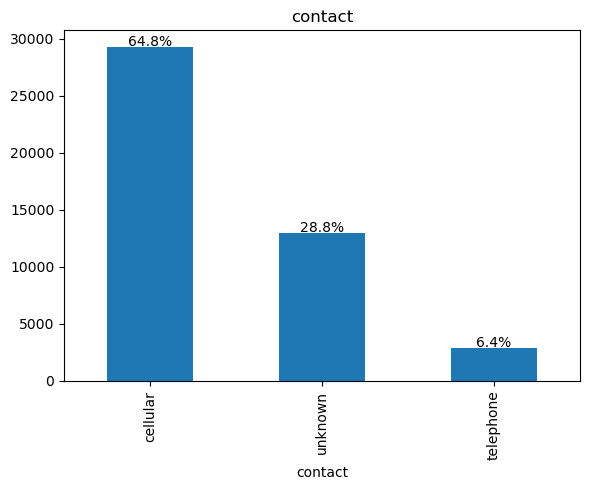

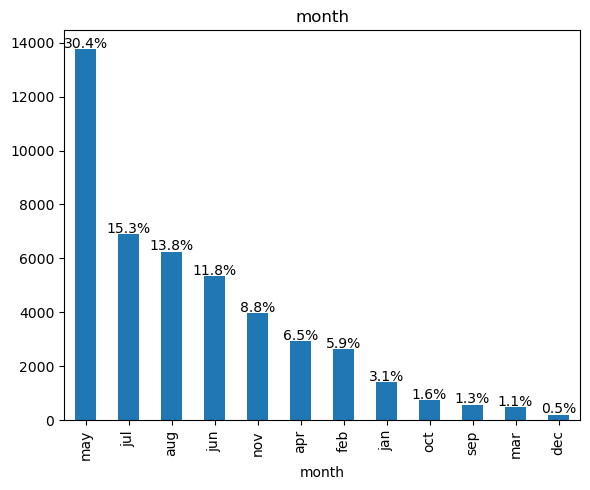

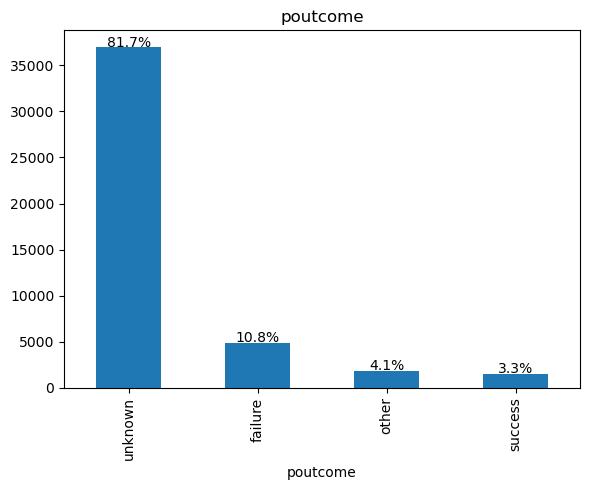

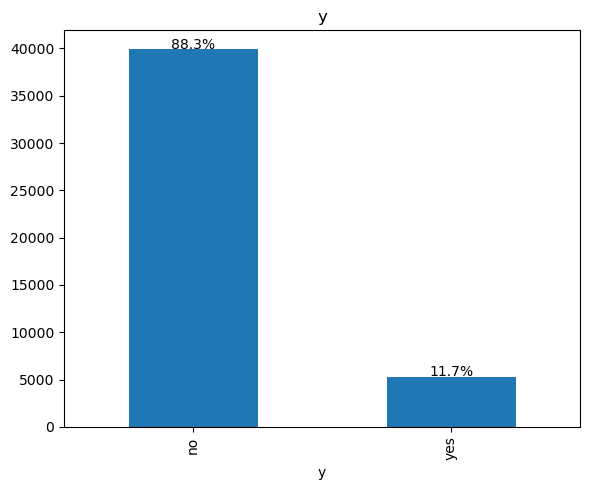

In [26]:
for i in df[categorical]:
    plt.figure(figsize=(6,5))
    g=df[i].value_counts().plot.bar()
    for j,k in enumerate(df[i].value_counts()):
        plt.text(j,k+50,str(round(k/len(df)*100,1))+'%',ha='center')
    plt.title(i)
    plt.tight_layout()

In [27]:
def bar_plot(x):
    dff=pd.DataFrame()
    dff['Deposit subscripted']=df[df['y']=='yes'][x].value_counts()
    dff['Not subscripted']=df[df['y']=='no'][x].value_counts()
    dff.plot.bar()
    plt.title(f'{x}  VS  Deposit',size=15)

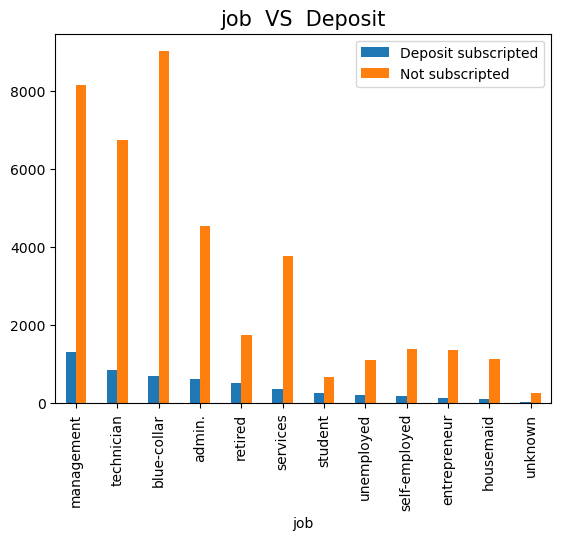

In [28]:
bar_plot('job')

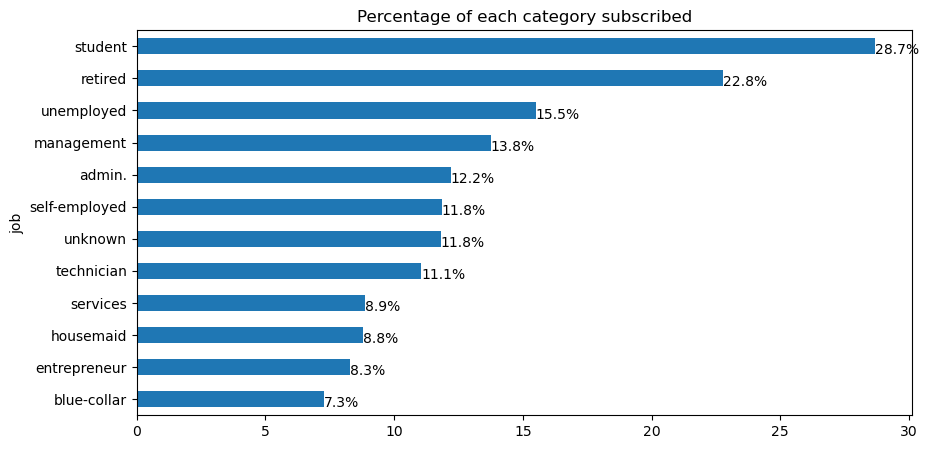

In [29]:
plt.title('Percentage of each category subscribed')
a=pd.crosstab(df.y,df.job).apply(lambda x:x/x.sum()*100).transpose().sort_values('yes',ascending=True)['yes'].plot(kind='barh',figsize=(10,5))
for j,i in enumerate(a.patches):
    plt.text(i.get_width(),i.get_y(),str(round(i.get_width(),1))+'%')

+ ### students and retired people are most likely to deposit (greater than 20%)
+ ### blue collar ,entrepreneur,housemaid,services are less likely to subscribe (less than 10 %)

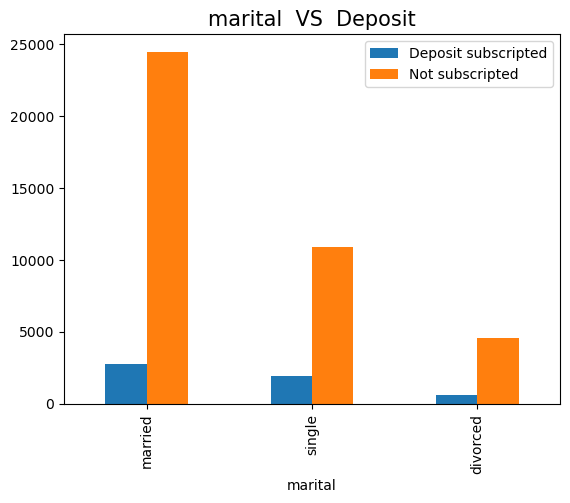

In [31]:
bar_plot('marital')


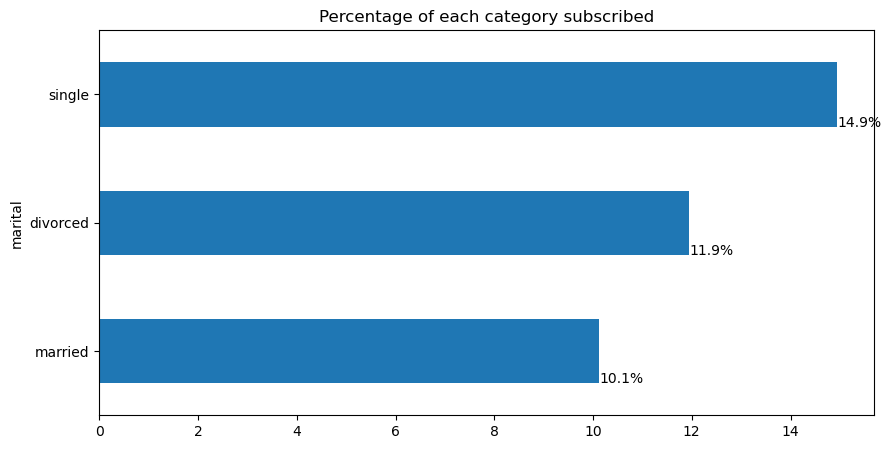

In [32]:
plt.title('Percentage of each category subscribed')
a=pd.crosstab(df.y,df.marital).apply(lambda x:x/x.sum()*100).transpose().sort_values('yes',ascending=True)['yes'].plot(kind='barh',figsize=(10,5))
for j,i in enumerate(a.patches):
    plt.text(i.get_width(),i.get_y(),str(round(i.get_width(),1))+'%')

+ ### Among the subscribers , married people are less likely to deposit 

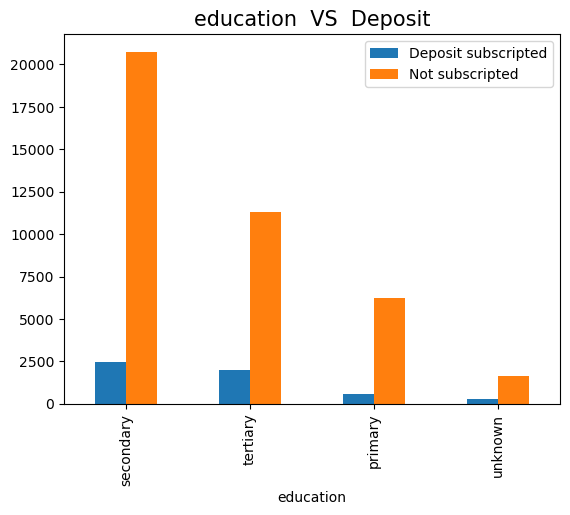

In [34]:
bar_plot('education')

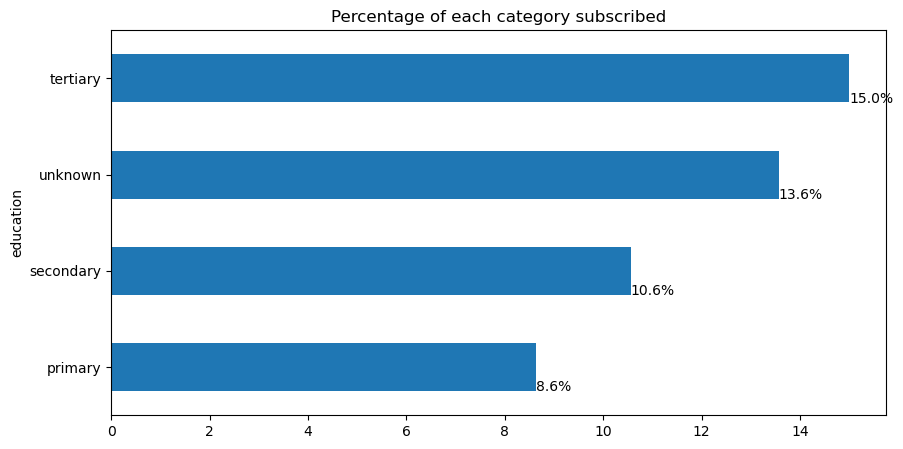

In [35]:
plt.title('Percentage of each category subscribed')
a=pd.crosstab(df.y,df.education).apply(lambda x:x/x.sum()*100).transpose().sort_values('yes',ascending=True)['yes'].plot(kind='barh',figsize=(10,5))
for j,i in enumerate(a.patches):
    plt.text(i.get_width(),i.get_y(),str(round(i.get_width(),1))+'%')

+ ### higher education people are more possible to deposit

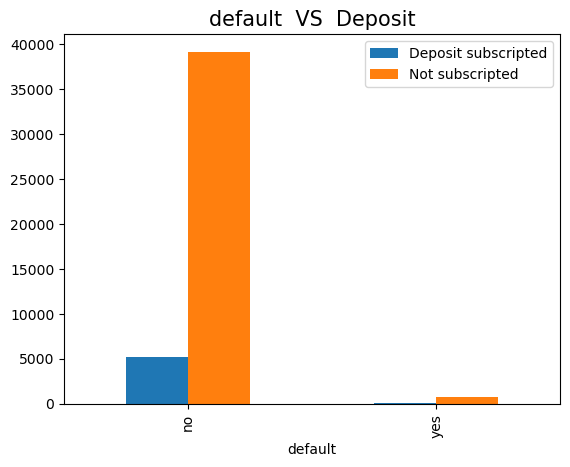

In [37]:
bar_plot('default')

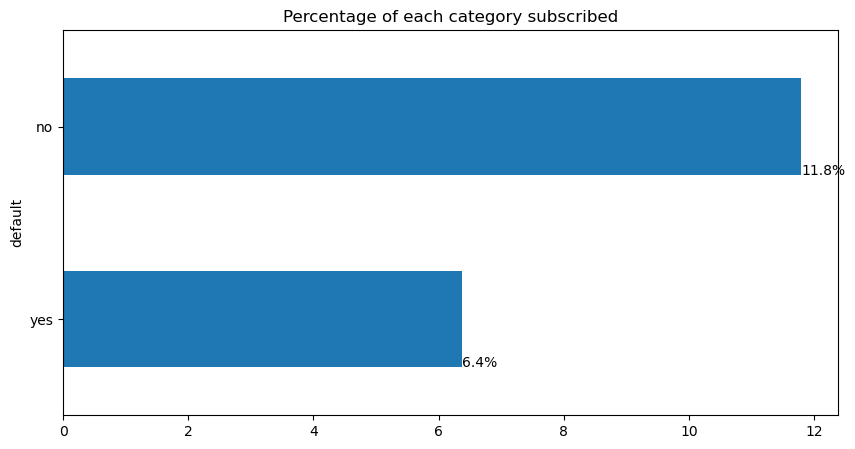

In [38]:
plt.title('Percentage of each category subscribed')
a=pd.crosstab(df.y,df.default).apply(lambda x:x/x.sum()*100).transpose().sort_values('yes',ascending=True)['yes'].plot(kind='barh',figsize=(10,5))
for j,i in enumerate(a.patches):
    plt.text(i.get_width(),i.get_y(),str(round(i.get_width(),1))+'%')

+ ### person who doesnt have deafault credit are more likely to deposit

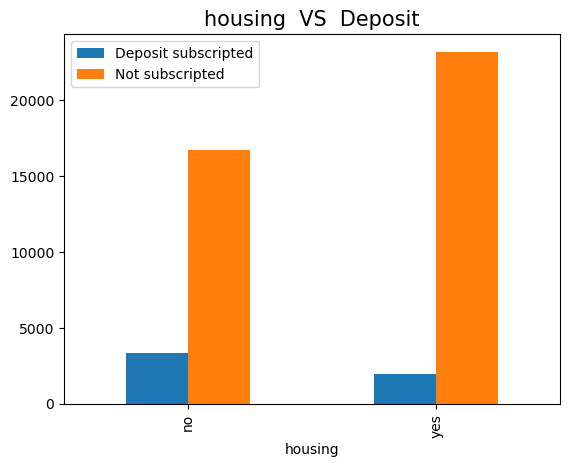

In [40]:
bar_plot('housing')

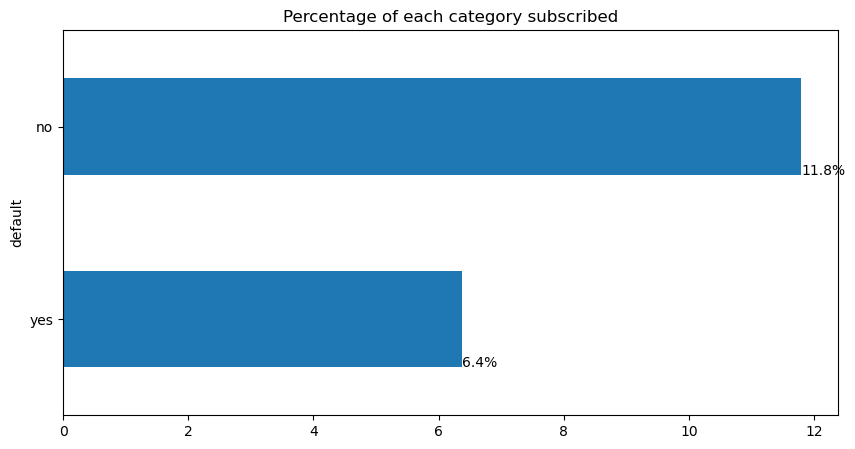

In [41]:
plt.title('Percentage of each category subscribed')
a=pd.crosstab(df.y,df.default).apply(lambda x:x/x.sum()*100).transpose().sort_values('yes',ascending=True)['yes'].plot(kind='barh',figsize=(10,5))
for j,i in enumerate(a.patches):
    plt.text(i.get_width(),i.get_y(),str(round(i.get_width(),1))+'%')

+ ### people without housing loan are more probable to deposit

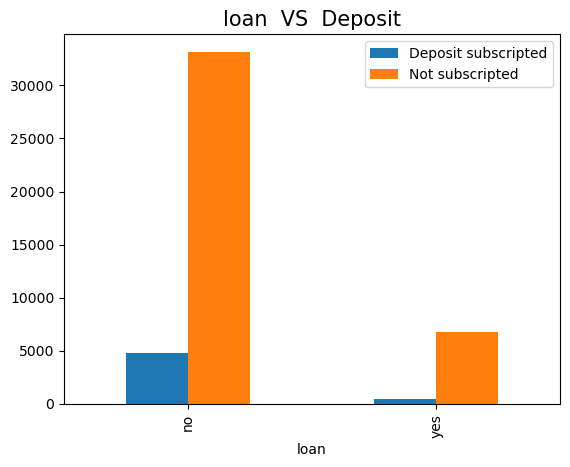

In [43]:
bar_plot('loan')

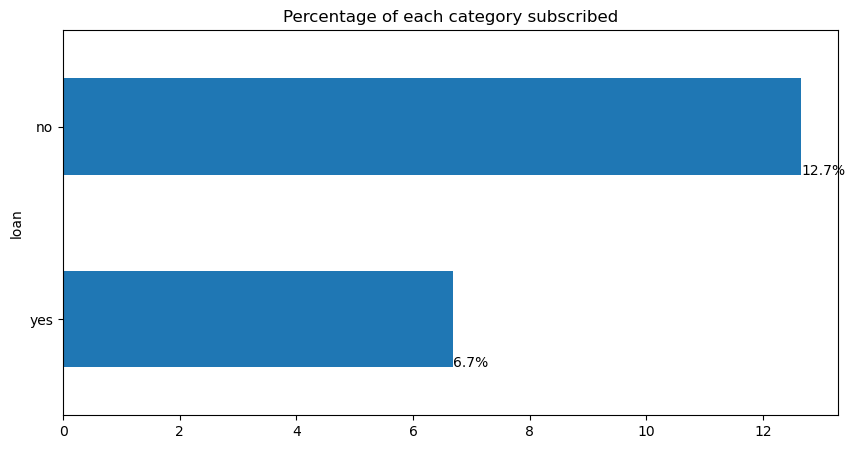

In [44]:
plt.title('Percentage of each category subscribed')
a=pd.crosstab(df.y,df.loan).apply(lambda x:x/x.sum()*100).transpose().sort_values('yes',ascending=True)['yes'].plot(kind='barh',figsize=(10,5))
for j,i in enumerate(a.patches):
    plt.text(i.get_width(),i.get_y(),str(round(i.get_width(),1))+'%')

+ ### people without personal loan are more probable to deposit

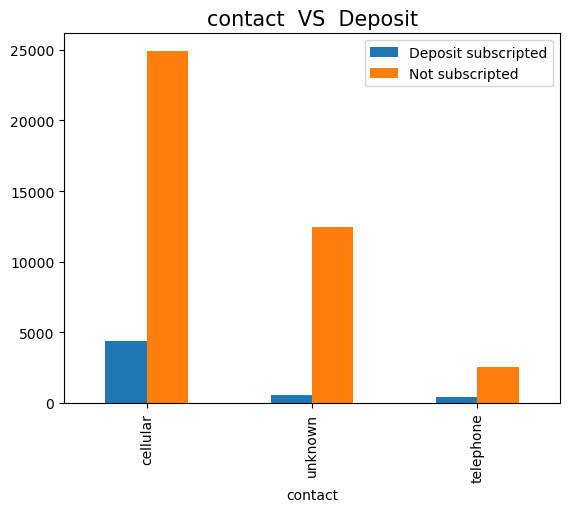

In [46]:
bar_plot('contact')

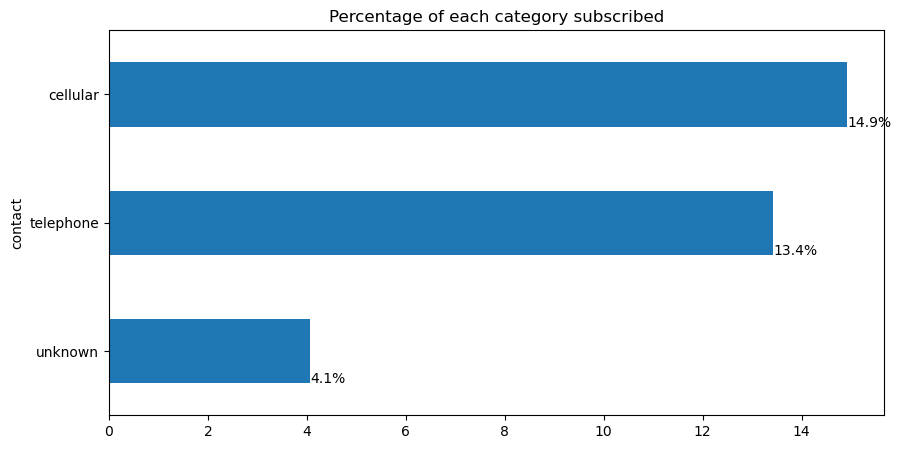

In [47]:
plt.title('Percentage of each category subscribed')
a=pd.crosstab(df.y,df.contact).apply(lambda x:x/x.sum()*100).transpose().sort_values('yes',ascending=True)['yes'].plot(kind='barh',figsize=(10,5))
for j,i in enumerate(a.patches):
    plt.text(i.get_width(),i.get_y(),str(round(i.get_width(),1))+'%')

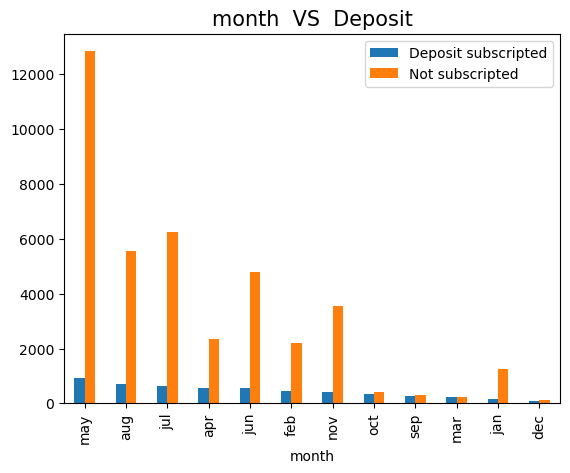

In [48]:
bar_plot('month')

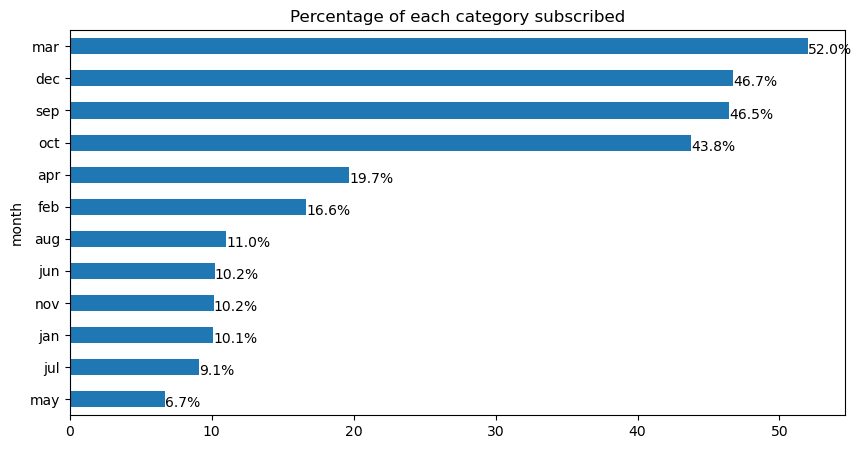

In [49]:
plt.title('Percentage of each category subscribed')
a=pd.crosstab(df.y,df.month).apply(lambda x:x/x.sum()*100).transpose().sort_values('yes',ascending=True)['yes'].plot(kind='barh',figsize=(10,5))
for j,i in enumerate(a.patches):
    plt.text(i.get_width(),i.get_y(),str(round(i.get_width(),1))+'%')

+ ### more people are subscribed in march, december ,october and september

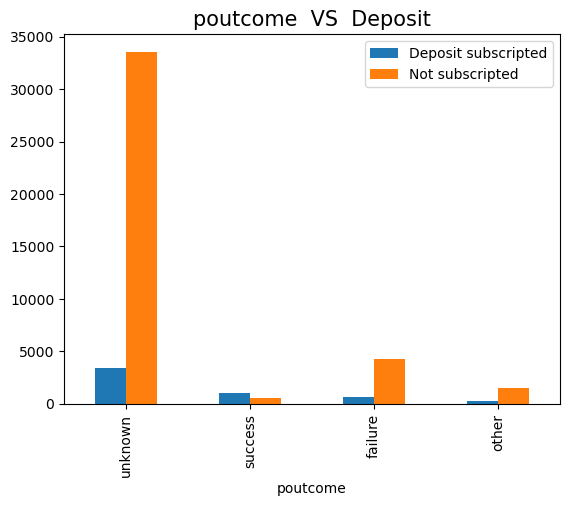

In [51]:
bar_plot('poutcome')

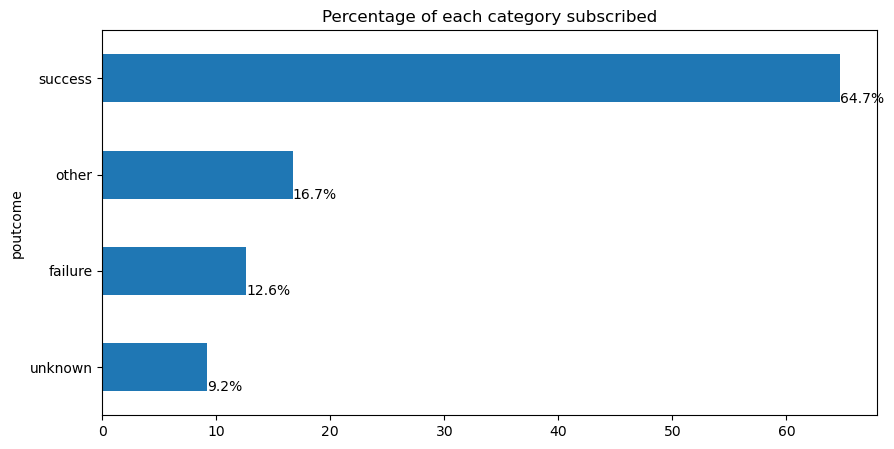

In [52]:
plt.title('Percentage of each category subscribed')
a=pd.crosstab(df.y,df.poutcome).apply(lambda x:x/x.sum()*100).transpose().sort_values('yes',ascending=True)['yes'].plot(kind='barh',figsize=(10,5))
for j,i in enumerate(a.patches):
    plt.text(i.get_width(),i.get_y(),str(round(i.get_width(),1))+'%')

+ ### majority of the people subscribed have been successfully contacted on previous campaign

## insight :
### most probable customers:
+ #### students and retired
+ #### having higher education
+ #### having no loans
+ #### single

# Label encoding categorical features

In [394]:
data=df.copy()
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
for i in categorical:
    data[i]=encoder.fit_transform(data[i])

In [396]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


# Standard scaling numerical features

In [399]:
scaled_df=data.copy()
from sklearn.preprocessing import StandardScaler
num=['age','balance','duration','pdays']
value=scaled_df[num].values
scaler=StandardScaler().fit(value)
values=scaler.transform(value)
scaled_df[num]=values
scaled_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1.606965,4,1,2,0,0.256419,1,0,2,5,8,0.011016,1,-0.411453,0,3,0
1,0.288529,9,2,1,0,-0.437895,1,0,2,5,8,-0.416127,1,-0.411453,0,3,0
2,-0.747384,2,1,1,0,-0.446762,1,1,2,5,8,-0.707361,1,-0.411453,0,3,0
3,0.571051,1,1,3,0,0.047205,1,0,2,5,8,-0.645231,1,-0.411453,0,3,0
4,-0.747384,11,2,3,0,-0.447091,0,0,2,5,8,-0.233620,1,-0.411453,0,3,0


### splitting data into test and train

In [402]:
from sklearn.model_selection import train_test_split
x=scaled_df.drop('y',axis=1)
y=scaled_df.iloc[:,-1]
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.8,random_state=42)

## model building

In [405]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix as c,accuracy_score as ac,classification_report as rp
model=LogisticRegression()
model.fit(x_train,y_train)
pred=model.predict(x_train)
pd.DataFrame({'Actual':y_train,"Predicted":pred}).head()

,Actual,Predicted
3344,0,0
17965,0,0
18299,0,0
10221,0,0
32192,1,0


In [406]:
#confusion matrix and accuracy
from sklearn.metrics import precision_score as pr ,recall_score as re
print('-'*50,'\nConfusion matrix \n','\n\n',c(y_train,pred),'\n','-'*50,'\n\nAccuracy : ',\
      ac(y_train,pred),'\nPrecision : ',pr(y_train,pred),'\nRecall : ',re(y_train,pred),'\n','-'*50,'\nClassifficarion report\n\n',rp(y_train,pred))

-------------------------------------------------- 
Confusion matrix 
 

 [[31356   614]
 [ 3301   897]] 
 -------------------------------------------------- 

Accuracy :  0.8917551426675514 
Precision :  0.5936465916611515 
Recall :  0.21367317770366842 
 -------------------------------------------------- 
Classifficarion report

               precision    recall  f1-score   support

           0       0.90      0.98      0.94     31970
           1       0.59      0.21      0.31      4198

    accuracy                           0.89     36168
   macro avg       0.75      0.60      0.63     36168
weighted avg       0.87      0.89      0.87     36168



In [409]:
pred=model.predict(x_train)
tr=ac(y_train,pred)
pred1=model.predict(x_test)
ts=ac(y_test,pred1)
print(f"Train accuracy : {round(tr,3)}\nTest accurqcy :{round(ts,3)}")

Train accuracy : 0.892
Test accurqcy :0.888


In [411]:
xx=sm.add_constant(x_train)
model2=sm.GLM(y_train,xx,family=sm.families.Binomial()).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                36168
Model:                            GLM   Df Residuals:                    36151
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -9625.3
Date:                Sun, 03 Mar 2024   Deviance:                       19251.
Time:                        11:56:04   Pearson chi2:                 5.13e+09
No. Iterations:                     7   Pseudo R-squ. (CS):             0.1695
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.4689      0.120    -20.591      0.000      -2.704      -2.234
age            0.0969      0.020      4.862      0.000       0.058       0.136
job            0.0088      0.006      1.467      0.142      -0.003       0.021
marital        0.2126      0.035      6.109      0.000       0.144       0.281
education      0.1818      0.026      7.028      0.000       0.131       0.232
default       -0.4240      0.178     -2.384      0.017      -0.773      -0.075
balance        0.0482      0.016      3.070      0.002       0.017       0.079
housing       -1.0397      0.043    -24.417      0.000      -1.123      -0.956
loan          -0.6744      0.063    -10.650      0.000      -0.799      -0.550
contact       -0.6609      0.031    -21.651      0.000      -0.721      -0.601
day           -0.0049      0.002     -2.100      0.036      -0.009      -0.000
month          0.0375      0.006      6.033      0.000       0.025       0.050
duration       1.0189      0.018     57.574      0.000       0.984       1.054
campaign      -0.1263      0.011    -11.258      0.000      -0.148      -0.104
pdays          0.3547      0.029     12.386      0.000       0.299       0.411
previous       0.0875      0.009      9.580      0.000       0.070       0.105
poutcome       0.2123      0.033      6.530      0.000       0.149       0.276
==============================================================================
"""

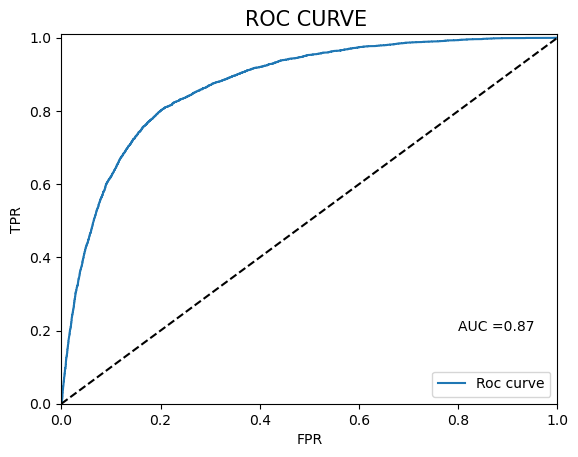

In [413]:
from sklearn.metrics import roc_auc_score,roc_curve
pred=model2.predict(xx)
auc=roc_auc_score(y_train,pred)
fpr,tpr,t=roc_curve(y_train,pred,drop_intermediate=0)
plt.plot(fpr,tpr)
plt.plot([0,1],[0,1],"k--")
plt.axis([0,1,0,1.01])
plt.legend(["Roc curve"],loc='lower right')
plt.text(s=f"AUC ={round(auc,2)}",x=0.8,y=0.2)
plt.title("ROC CURVE ",size=15)
plt.ylabel("TPR")
plt.xlabel("FPR");

+ ### Accuracy is 89%
+ ### But since the data is unbalanced accuracy is not enough alone
+ ### precision and recall of class 0 (not subscripted) is 90% and 98 %
+ ### But precision and recall of class 1 (subscripted) is 59% and 21 %
+ ### ie , model accuracy is good on negative class
+ ### and model performance is very poor on positive class

In [463]:
from sklearn.preprocessing import binarize
from sklearn.metrics import f1_score as f
pred1=model.predict_proba(x_test)[:,1]
pred=model.predict_proba(x_train)[:,1]
thres=pd.DataFrame(columns=['Threshold','Train Accuracy','Test Accuracy', 'Sensitivity','Specificity','Precision','F1 score'])
for i in [0.1,.2,.3 ,.4,.5]:
    prt=binarize(pred.reshape(-1,1),threshold=i)
    prs=binarize(pred1.reshape(-1,1),threshold=i)
    cm=c(y_train,prt)
    thres.loc[len(thres)]=[i,ac(y_train,prt),ac(y_test,prs),re(y_train,prt),cm[0,0]/(cm[0,0]+cm[0,1]),pr(y_train,prt),f(y_train,prt)]
thres

,Threshold,Train Accuracy,Test Accuracy,Sensitivity,Specificity,Precision,F1 score
0,0.1,0.745134,0.739578,0.850643,0.731279,0.293619,0.436553
1,0.2,0.870438,0.862988,0.613626,0.904160,0.456738,0.523684
2,0.3,0.889737,0.883003,0.429014,0.950235,0.530955,0.474572
3,0.4,0.893718,0.886653,0.299190,0.971786,0.582020,0.395217
4,0.5,0.891755,0.887758,0.213673,0.980794,0.593647,0.314241


+ ### At threshold 0.2 , model get great performance on positive class (ie subscription 'yes' )
+ ### f1 score is also maximum at 0.2 threshold
+ ### but however model overall accuracy is less decreased
+ ### because at 0.2 threshold, model performance on negative class is reduced (ie specificity reduced)